<h1>(ML)Resale Car Price Prediction in Singapore

Capstone Project 12 Mar 2022 by Derek Tan

Reference:

https://www.sgcarmart.com/main/about_us.php


https://github.com/xianjinseow92/Data-Science-Projects/tree/master/Project_2_SgCarMart%20Price%20Prediction


demo1 : https://www.sgcarmart.com/used_cars/info.php?ID=1070098&DL=3734&GASRC=dy (Lamborgini Urus)(SUV)


demo2 : https://www.sgcarmart.com/used_cars/info.php?ID=1078684&DL=1000 (Porsche Cayman GTS 3.4A PDK)(Sports Car)

<h1>Importing some libraries

In [1]:
# Data analysis and cleaning
import pandas as pd
import numpy as np
import missingno as msno

# Data Vizualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing and machine learning train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model evaluation 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Deployment
import joblib

In [3]:
#loading the new dataset
df2 = pd.read_csv('mlsgcarmartclean.csv')

In [4]:
df2.head()

,Unnamed: 0,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,MANUFACTURED_YEAR,TRANSMISSION,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,1,3,215388.0,20270.0,12000.0,2020,0,56927.0,39500.0,3191.0,1998.0,1470.0,2.0,1
1,2,31,147777.0,15950.0,40000.0,2019,0,26008.0,33520.0,3043.0,1595.0,1435.0,1.0,4
2,3,29,68888.0,11100.0,63000.0,2017,0,19513.0,50526.0,1922.0,1998.0,1535.0,1.0,2
3,5,20,50800.0,9120.0,133000.0,2016,0,14626.0,50951.0,1735.0,1591.0,1295.0,2.0,3
4,6,26,74388.0,15320.0,87000.0,2016,0,22821.0,56089.0,1583.0,1499.0,1115.0,1.0,0


In [5]:
df2.drop(['Unnamed: 0'],axis=1, inplace=True)

<h1>Preparing for data

In [6]:
X = df2.drop(['PRICE'],axis=1)
y = df2['PRICE']

<h1>Train Test Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4254, 12)
Number transactions y_train dataset:  (4254,)
Number transactions X_test dataset:  (1064, 12)
Number transactions y_test dataset:  (1064,)


In [8]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle=True)

<h1>Linear Regression

In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)
results = cross_val_score(reg, X_train, y_train, cv = kfold)
print('Train Score:', reg.score(X_train, y_train))
print('Test Score:', reg.score(X_test, y_test))
print('Linear Regression, Cross-Validation Mean Score: %.4f' % results.mean())

Train Score: 0.8255790717900826
Test Score: 0.8178178864112006
Linear Regression, Cross-Validation Mean Score: 0.8207


In [10]:
y_pred = reg.predict(X_test)

In [11]:
r2_score(y_test, y_pred)

0.8178178864112006

In [12]:
y_pred = reg.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RSME: ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  27848.941151954394
MSE:  2352435395.051663
RSME:  48501.91125153382


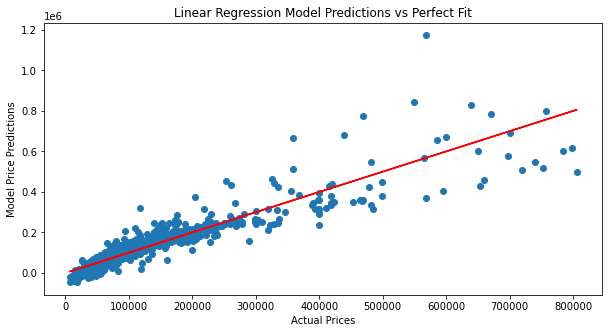

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')
plt.title('Linear Regression Model Predictions vs Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Model Price Predictions')
plt.show()

<h1>Neural Network

In [14]:
# #double check the columns for input_dim
# X.shape

In [15]:
# # creating a model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam

# models = Sequential()

# # input layer
# models.add(Dense(15,input_dim=15,activation='relu'))

# # # hidden layers
# models.add(Dense(15,activation='relu'))
# models.add(Dense(50,activation='relu'))
# models.add(Dense(15,activation='relu'))



# # output layer
# models.add(Dense(1,input_dim=15, activation='linear'))

# models.compile(optimizer='adam',loss='mse')



In [16]:
# %%time
# models.fit(x=X_train,y=y_train.values,
#           validation_data=(X_test,y_test.values),
#           batch_size=128,epochs=400)

In [17]:
# losses = pd.DataFrame(models.history.history)

# plt.figure(figsize=(15,5))
# sns.lineplot(data=losses,lw=3)
# plt.xlabel('Epochs')
# plt.title('Training Loss per Epoch')
# sns.despine()

In [18]:
# # predictions on the test set
# nn_predictions = models.predict(X_test)

# print('MAE: ',mean_absolute_error(y_test,nn_predictions))
# print('MSE: ',mean_squared_error(y_test,nn_predictions))
# print('RMSE: ',np.sqrt(mean_squared_error(y_test,nn_predictions)))

In [19]:
# plt.figure(figsize=(10,5))
# plt.scatter(y_test,nn_predictions)
# plt.plot(y_test,y_test,'r')
# plt.title('Neural Network Model Predictions vs Perfect Fit')
# plt.xlabel('Actual Prices')
# plt.ylabel('Model Price Predictions')
# plt.show()

<h1>XG Boost Regressor

In [20]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)

xgb_results = cross_val_score(xgb_model, X_train, y_train, cv = kfold)
print('XG Boost Regressor Train Score:', xgb_model.score(X_train, y_train))
print('XG Boost Regressor Test Score:', xgb_model.score(X_test, y_test))
print('XG Boost Regressor, Cross-Validation Mean Score: %.4f' % xgb_results.mean())

XG Boost Regressor Train Score: 0.9998239414145619
XG Boost Regressor Test Score: 0.9823119808774532
XG Boost Regressor, Cross-Validation Mean Score: 0.9826


In [21]:
xgb_predictions = xgb_model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,xgb_predictions))
print('MSE: ',mean_squared_error(y_test,xgb_predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,xgb_predictions)))

MAE:  5893.046266942993
MSE:  228397406.48825034
RMSE:  15112.822585084838


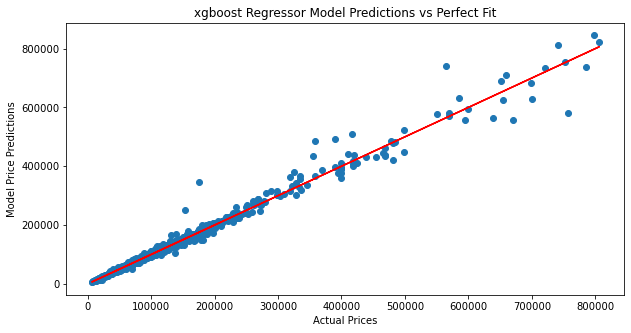

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,xgb_predictions)
plt.plot(y_test,y_test,'r')
plt.title('xgboost Regressor Model Predictions vs Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Model Price Predictions')
plt.show()

<h1>Gradient Boosting Regressor

In [23]:
gbr = GradientBoostingRegressor(learning_rate=0.2, max_depth=10,
                          min_samples_split=100, n_estimators=20)
gbr.fit(X_train,y_train)

gbr_results = cross_val_score(gbr, X_train, y_train, cv = kfold)
print('Train Score:', gbr.score(X_train, y_train))
print('Test Score:', gbr.score(X_test, y_test))
print('Gradient Boosting Regressor, Cross-Validation Mean Score: %.4f' % gbr_results.mean())

gbr_predictions = gbr.predict(X_test)

Train Score: 0.991395359120084
Test Score: 0.9749049575261534
Gradient Boosting Regressor, Cross-Validation Mean Score: 0.9787


In [24]:
print('Gradient Boosting Regressor MAE: ',mean_absolute_error(y_test,gbr_predictions))
print('Gradient Boosting Regressor MSE: ',mean_squared_error(y_test,gbr_predictions))
print('Gradient Boosting Regressor RMSE: ',np.sqrt(mean_squared_error(y_test,gbr_predictions)))

Gradient Boosting Regressor MAE:  7274.477578460913
Gradient Boosting Regressor MSE:  324040955.46419793
Gradient Boosting Regressor RMSE:  18001.137615834115


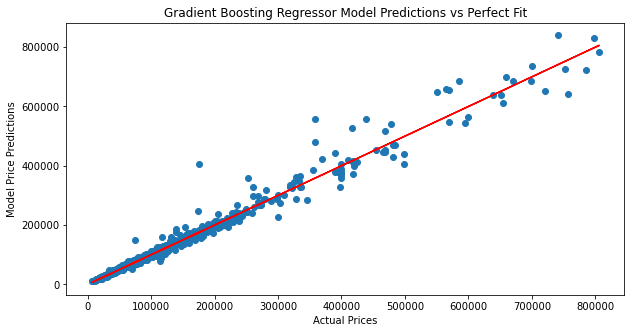

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,gbr_predictions)
plt.plot(y_test,y_test,'r')
plt.title('Gradient Boosting Regressor Model Predictions vs Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Model Price Predictions')
plt.show()

<h1> GridsearchCV on Gradient Boosting Regressor

In [26]:
# from sklearn.model_selection import GridSearchCV

# params = {'n_estimators':range(20,1001,10),
#               'max_depth':[10], #range(5,16,2), 
#               'min_samples_split':[100], #range(200,1001,200), 
#               'learning_rate':[0.2]}

In [27]:
# searchgbr = GridSearchCV(estimator=gbr, 
#                    param_grid = params, 
#                          n_jobs=-1)

In [28]:
# %%time
# smgbr = searchgbr.fit(X_train,y_train)

In [29]:
# smgbr.best_estimator_

<h1>Decision Tree

In [30]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

dt_results = cross_val_score(dt, X_train, y_train, cv = kfold)
print('Train Score:', dt.score(X_train, y_train))
print('Test Score:', dt.score(X_test, y_test))
print('Decision Tree, Cross-Validation Mean Score: %.4f' % dt_results.mean())

Train Score: 1.0
Test Score: 0.9257208254322324
Decision Tree, Cross-Validation Mean Score: 0.9618


In [31]:
dt_predictions = dt.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,dt_predictions))
print('MSE: ',mean_squared_error(y_test,dt_predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,dt_predictions)))

MAE:  10684.267857142857
MSE:  959133451.2828947
RMSE:  30969.87974279033


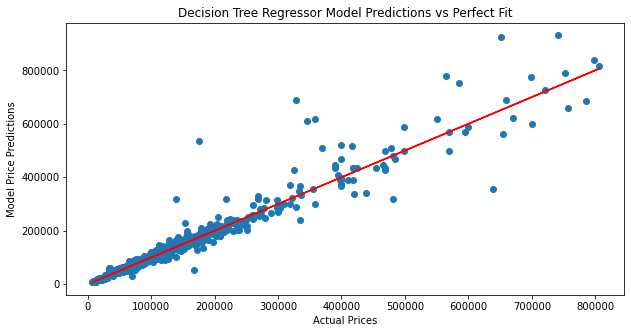

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,dt_predictions)
plt.plot(y_test,y_test,'r')
plt.title('Decision Tree Regressor Model Predictions vs Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Model Price Predictions')
plt.show()

<h1>Random Forest

In [33]:
rf = RandomForestRegressor(n_estimators=200 ,random_state=42,max_depth=20, max_features=10, n_jobs=-1)
rf.fit(X_train,y_train)

rf_results = cross_val_score(rf, X_train, y_train, cv = kfold)
print('Train Score:', rf.score(X_train, y_train))
print('Test Score:', rf.score(X_test, y_test))
print('Random Forest, Cross-Validation Mean Score: %.4f' % rf_results.mean())

Train Score: 0.9982043361632152
Test Score: 0.9833544759432128
Random Forest, Cross-Validation Mean Score: 0.9862


<h1> GridsearchCV on Random Forest

In [34]:
# from sklearn.model_selection import GridSearchCV

# params = {'n_estimators': [50,200,300,400,500,600,700], 
#          'max_depth' : [5,10,15,20,25],
#          'max_features' : [2,4,6,8,10]}

In [35]:
# search = GridSearchCV(estimator=rf,
#                      param_grid= params,
#                      n_jobs = -1)

In [36]:
# %%time
# sm = search.fit(X_train,y_train)

In [37]:
# sm.best_estimator_

In [38]:
rf_predictions = rf.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,rf_predictions))
print('MSE: ',mean_squared_error(y_test,rf_predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,rf_predictions)))

MAE:  5649.822884077357
MSE:  214936138.29045823
RMSE:  14660.700470661634


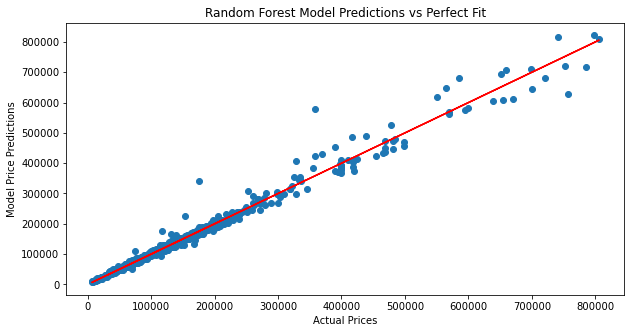

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,rf_predictions)
plt.plot(y_test,y_test,'r')
plt.title('Random Forest Model Predictions vs Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Model Price Predictions')
plt.show()

<H1>Deployment(Flask)

In [40]:
joblib.dump(rf,'final_model.pkl')
# models.save("price_prediction_model.h5")

['final_model.pkl']

In [41]:
df2.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,MANUFACTURED_YEAR,TRANSMISSION,OMV,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE
0,3,215388.0,20270.0,12000.0,2020,0,56927.0,39500.0,3191.0,1998.0,1470.0,2.0,1
1,31,147777.0,15950.0,40000.0,2019,0,26008.0,33520.0,3043.0,1595.0,1435.0,1.0,4
2,29,68888.0,11100.0,63000.0,2017,0,19513.0,50526.0,1922.0,1998.0,1535.0,1.0,2
3,20,50800.0,9120.0,133000.0,2016,0,14626.0,50951.0,1735.0,1591.0,1295.0,2.0,3
4,26,74388.0,15320.0,87000.0,2016,0,22821.0,56089.0,1583.0,1499.0,1115.0,1.0,0
